In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv("../assets/Country-data.csv", header=0)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
legend=pd.read_csv("../assets/data-dictionary.csv")
legend

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
data.shape

(167, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


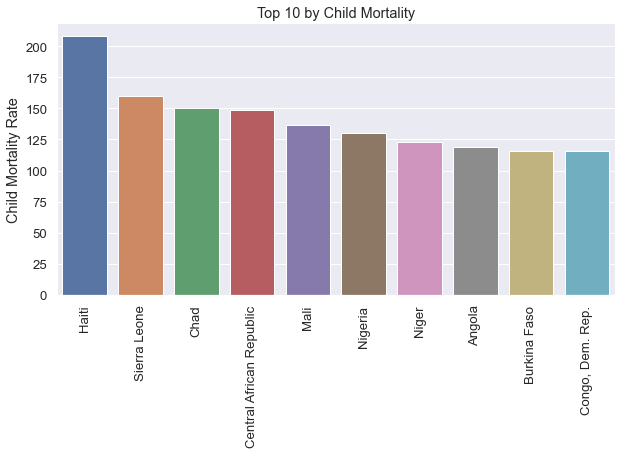

In [9]:
sns.set(font_scale=1.2)
plt.figure(figsize = (10,5))
child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate', title='Top 10 by Child Mortality')
plt.xticks(rotation=90)
plt.show()

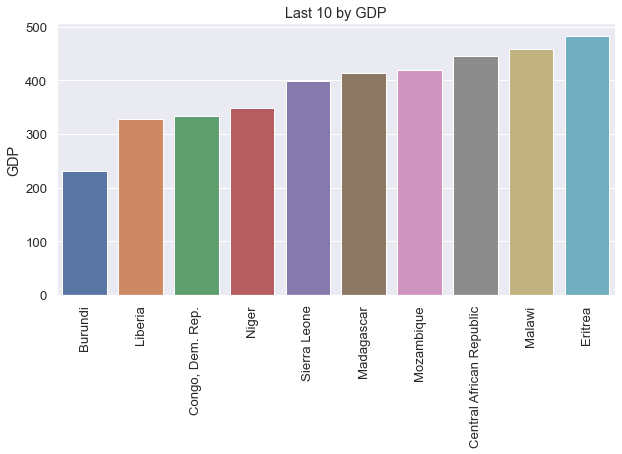

In [10]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
ax.set(xlabel = '', ylabel= 'GDP',  title='Last 10 by GDP')
plt.xticks(rotation=90)
plt.show()

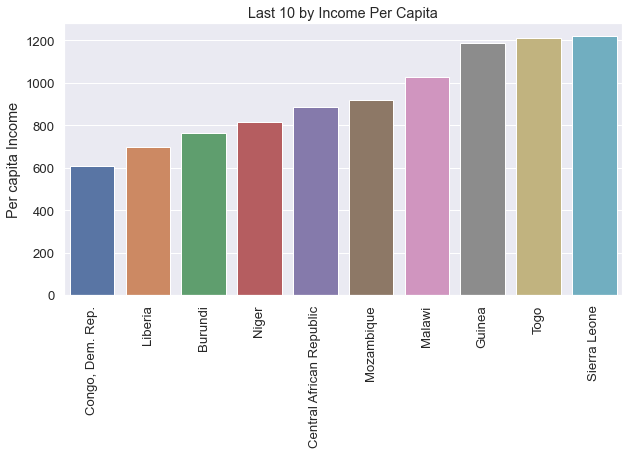

In [11]:
plt.figure(figsize = (10,5))
income_bottom10 = data[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
ax.set(xlabel = '', ylabel= 'Per capita Income', title='Last 10 by Income Per Capita')
plt.xticks(rotation=90)
plt.show()

# Розглянемо 5 країн з найнижчими показниками за кожним фактором.

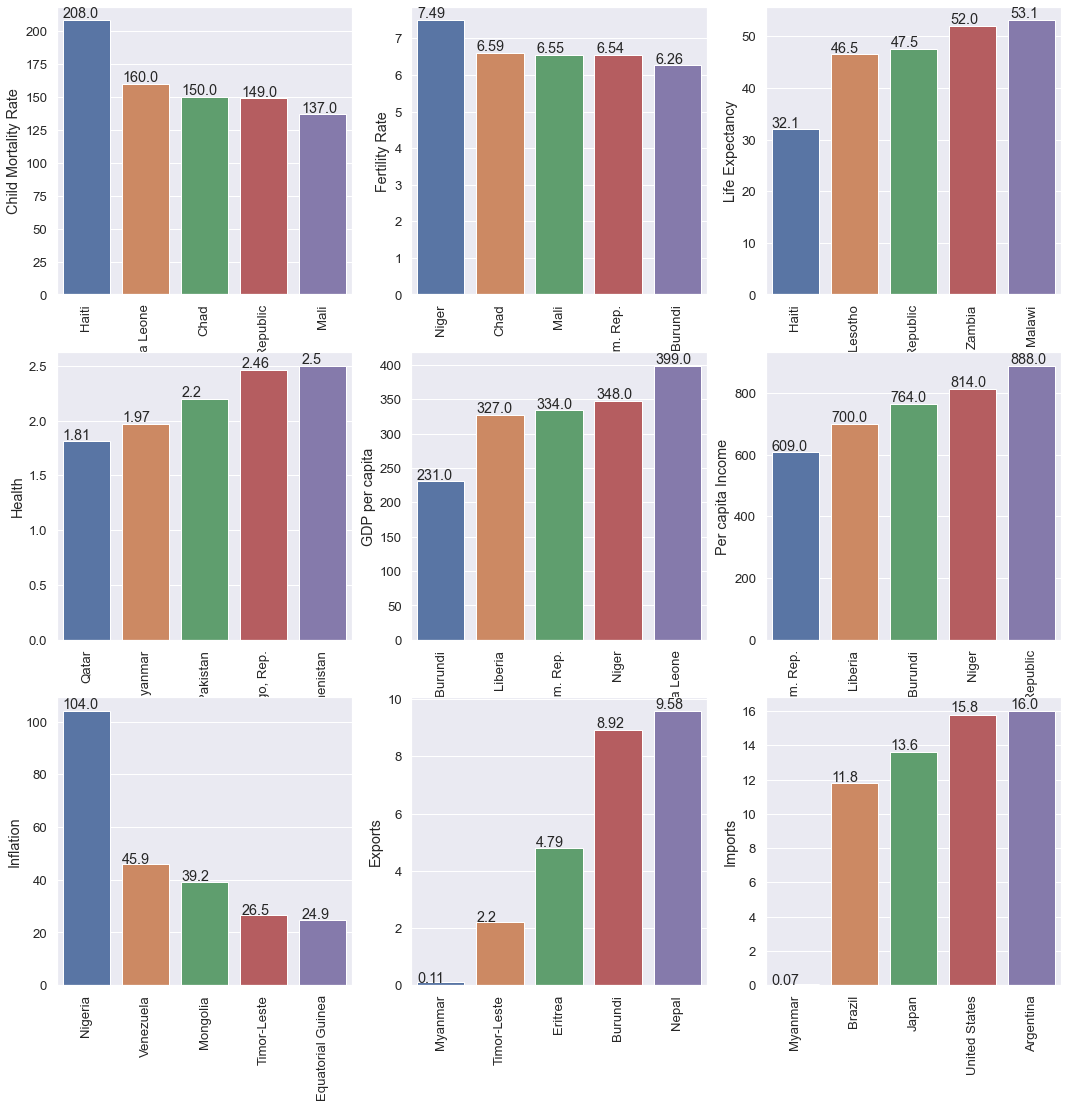

In [22]:
fig, axs = plt.subplots(3,3,figsize = (18,18))
top5_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

top5_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

bottom5_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

bottom5_health = data[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

bottom5_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

bottom5_income = data[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')

top5_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')

bottom5_exports = data[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')

bottom5_imports = data[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
plt.show()


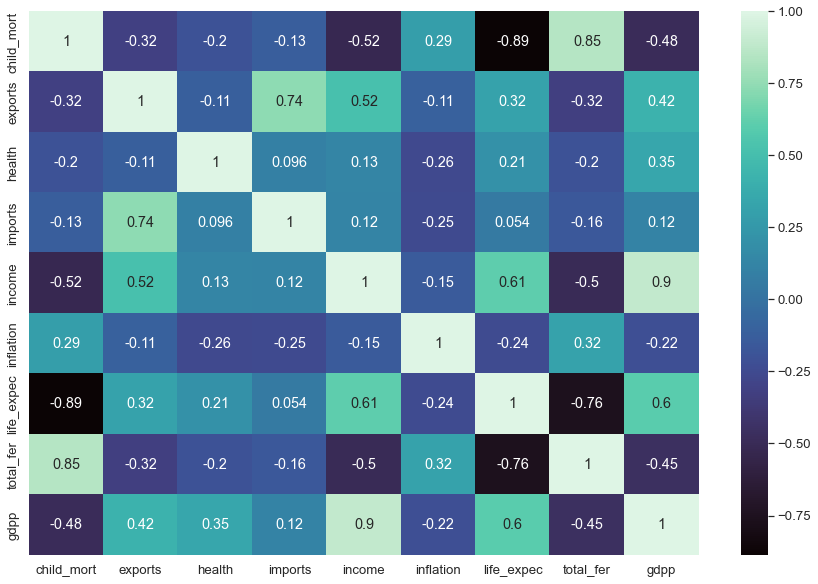

In [13]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True, cmap="mako")
plt.show()

* дитяча смертність та очікувана тривалість життя сильно корелюють з коефіцієнтом кореліцяї -0,89
* дитяча смертність та сумарна народжуваність мають високу кореляцію з коефіцієнтом кореляції 0,85
* імпорт та експорт сильно корелюють між собою з коефіцієнтом кореляції 0,99
* вартість життя та сумарна народжуваність сильно корелюють між собою з коефіцієнтом кореляції -0,76

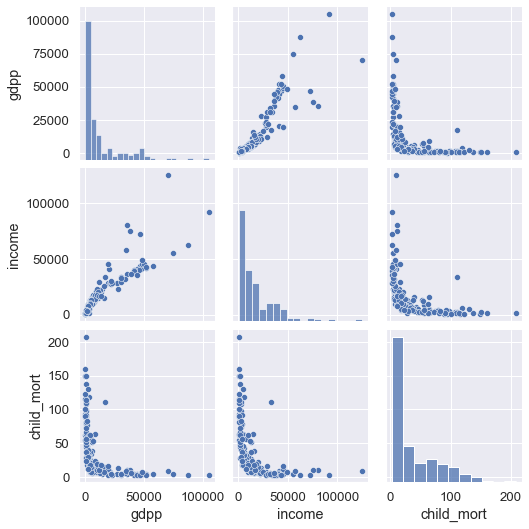

In [21]:
studied = data.loc[:,['gdpp', 'income', 'child_mort']]
sns.pairplot(studied, diag_kind="hist")
plt.show()

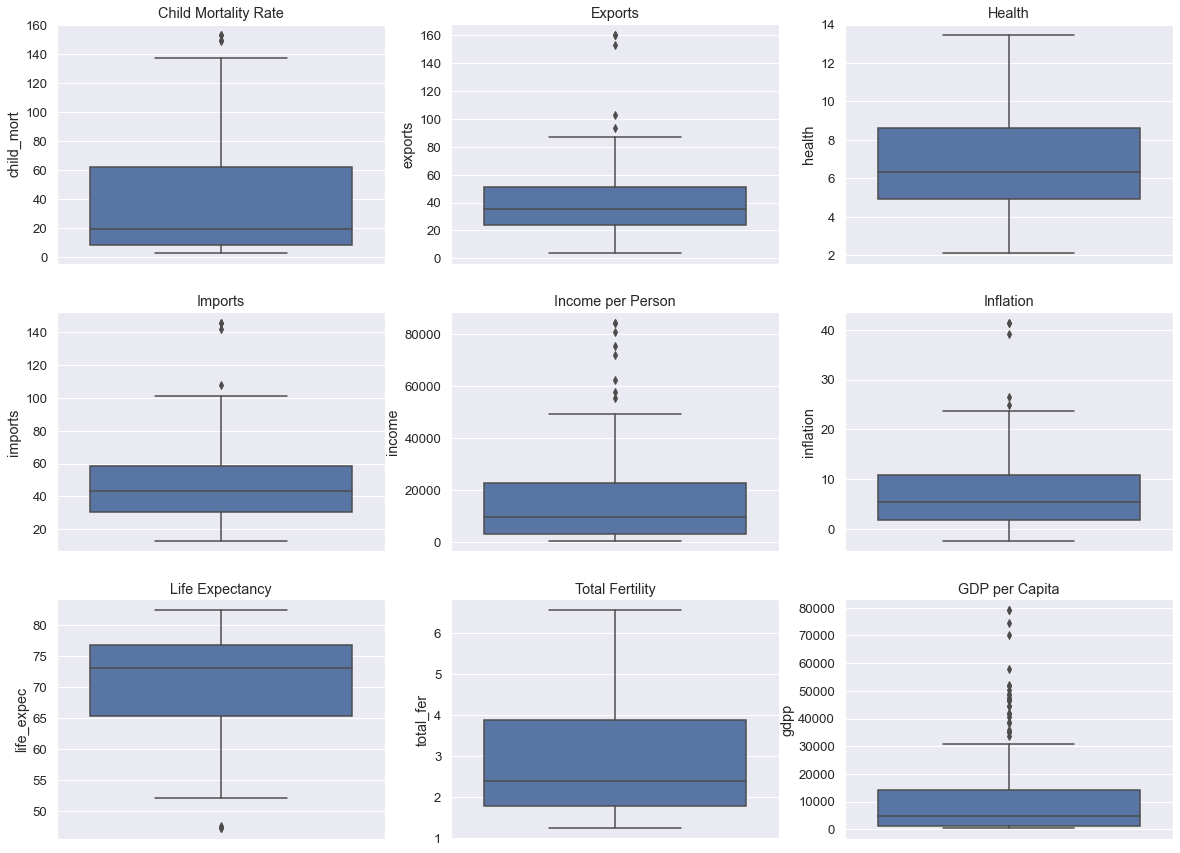

In [55]:
f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.boxplot(y=data.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.boxplot(y=data.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.boxplot(y=data.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.boxplot(y=data.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.boxplot(y=data.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.boxplot(y=data.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.boxplot(y=data.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.boxplot(y=data.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.boxplot(y=data.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
plt.show()

### За всіма характеристиками є щонайменше один викид

> У випадку з gdpp та охороною здоров'я є занадто багато викидів.
> Оскільки ми маємо обмежену кількість країн(167), видалення цих викидів зменшить форму даних, і слаборозвинені
> країни, які насправді гостро потребують допомоги, можуть бути не врахованими.

#### Оптимізуємо викиди в даних методом Percentile Capping

In [39]:
Q3 = data.exports.quantile(0.99)
Q1 = data.exports.quantile(0.01)
data['exports'][data['exports']<=Q1]=Q1
data['exports'][data['exports']>=Q3]=Q3
Q3 = data.imports.quantile(0.99)
Q1 = data.imports.quantile(0.01)
data['imports'][data['imports']<=Q1]=Q1
data['imports'][data['imports']>=Q3]=Q3
Q3 = data.health.quantile(0.99)
Q1 = data.health.quantile(0.01)
data['health'][data['health']<=Q1]=Q1
data['health'][data['health']>=Q3]=Q3
Q3 = data.income.quantile(0.99)
Q1 = data.income.quantile(0.01)
data['income'][data['income']<=Q1]=Q1
data['income'][data['income']>=Q3]=Q3
Q3 = data.inflation.quantile(0.99)
Q1 = data.inflation.quantile(0.01)
data['inflation'][data['inflation']<=Q1]=Q1
data['inflation'][data['inflation']>=Q3]=Q3
Q3 = data.life_expec.quantile(0.99)
Q1 = data.life_expec.quantile(0.01)
data['life_expec'][data['life_expec']<=Q1]=Q1
data['life_expec'][data['life_expec']>=Q3]=Q3
Q3 = data.child_mort.quantile(0.99)
Q1 = data.child_mort.quantile(0.01)
data['child_mort'][data['child_mort']<=Q1]=Q1
data['child_mort'][data['child_mort']>=Q3]=Q3
Q3 = data.total_fer.quantile(0.99)
Q1 = data.total_fer.quantile(0.01)
data['total_fer'][data['total_fer']<=Q1]=Q1
data['total_fer'][data['total_fer']>=Q3]=Q3
Q3 = data.gdpp.quantile(0.99)
Q1 = data.gdpp.quantile(0.01)
data['gdpp'][data['gdpp']<=Q1]=Q1
data['gdpp'][data['gdpp']>=Q3]=Q3

C:\Users\Lenovo\anaconda3\envs\numpyPrjct\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\anaconda3\envs\numpyPrjct\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Lenovo\anaconda3\envs\numpyPrjct\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

# K- means Clustering
Кластеризація K-середніх - один з найпростіших і найпопулярніших алгоритмів машинного навчання.
Алгоритм працює наступним чином:
Спочатку ми випадковим чином ініціалізуємо k точок, які називаються середніми. Ми класифікуємо кожен елемент до його найближчого середнього значення і оновлюємо координати середнього значення, які є середніми значеннями елементів, класифікованих до цього часу в цьому середньому значенні. Ми повторюємо процес для заданої кількості ітерацій і в кінці отримуємо наші кластери.

Фундаментальним кроком для будь-якого неконтрольованого алгоритму є визначення оптимальної кількості кластерів, в які можуть бути згруповані дані. Метод ліктя є одним з найпопулярніших методів визначення цього оптимального значення k.

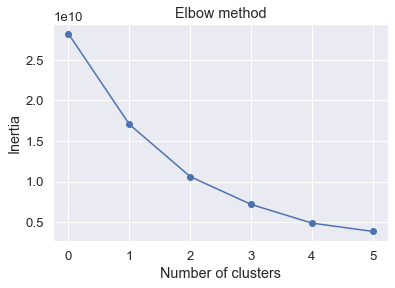

In [40]:
data_df1 = pd.DataFrame(data, columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'])
ssd = []
for num_clusters in list(range(2,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(data_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

> Дивлячись на наведену вище криву ліктьового згину, варто виокремити з 3 кластери.

In [41]:
#K-means з 3 класетрами

cluster = KMeans(n_clusters=3, max_iter=150, random_state= 50)
cluster.fit(data_df1)

data['cluster_id'] = cluster.labels_
data.cluster_id.value_counts(ascending=True)

2     23
1     35
0    109
Name: cluster_id, dtype: int64

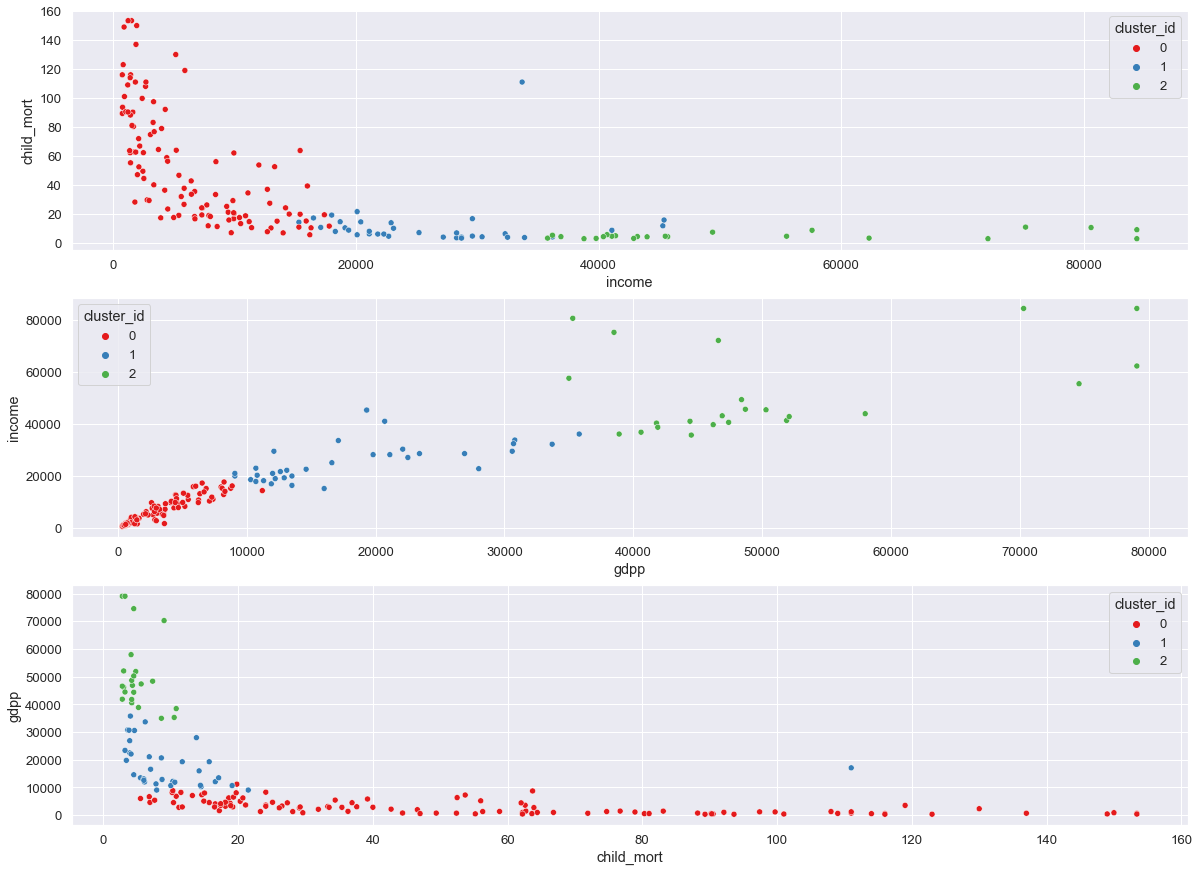

In [42]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='cluster_id',data = data,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='cluster_id', data = data,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='cluster_id', data=data,legend='full',palette="Set1")
plt.show()

### Переглянемо дані отрмані після оптимізації гіпер-параметрів та кластеризації

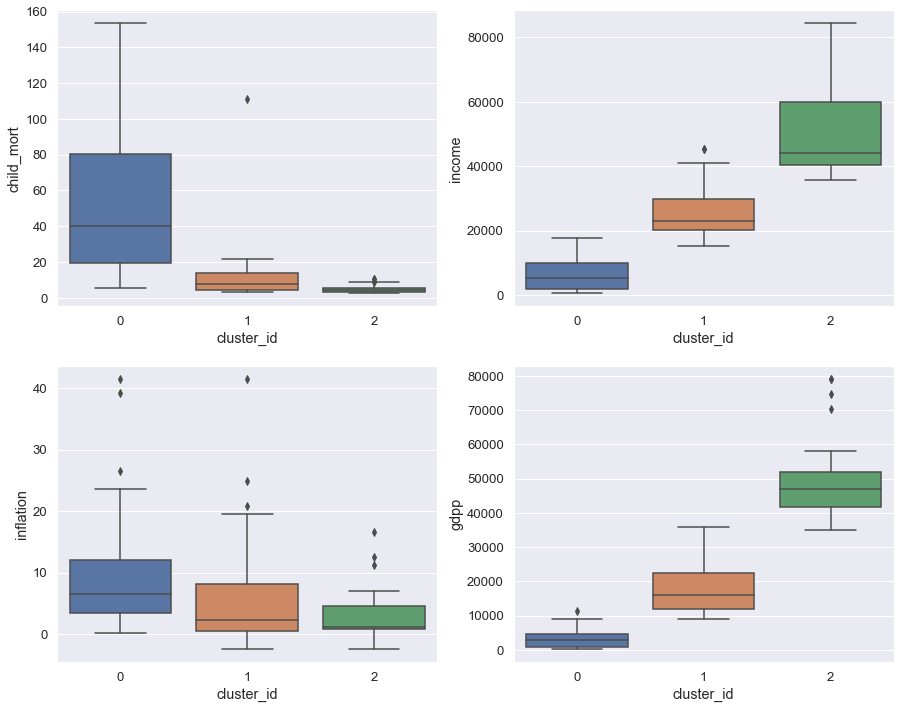

In [54]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'cluster_id', y = 'child_mort', data = data,ax=axes[0][0])
sns.boxplot(x = 'cluster_id', y = 'income', data = data,ax=axes[0][1])
sns.boxplot(x = 'cluster_id', y = 'inflation', data=data,ax=axes[1][0])
sns.boxplot(x = 'cluster_id', y = 'gdpp', data=data,ax=axes[1][1])
plt.show()

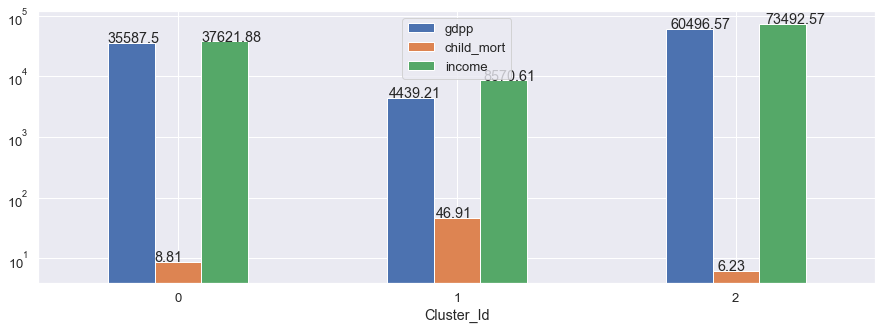

In [45]:
ax=data[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

In [47]:
finalList=data[data['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
finalList['country']
finalList.reset_index(drop=True).country[:5]

0                Sierra Leone
1                       Haiti
2                        Chad
3    Central African Republic
4                        Mali
Name: country, dtype: object

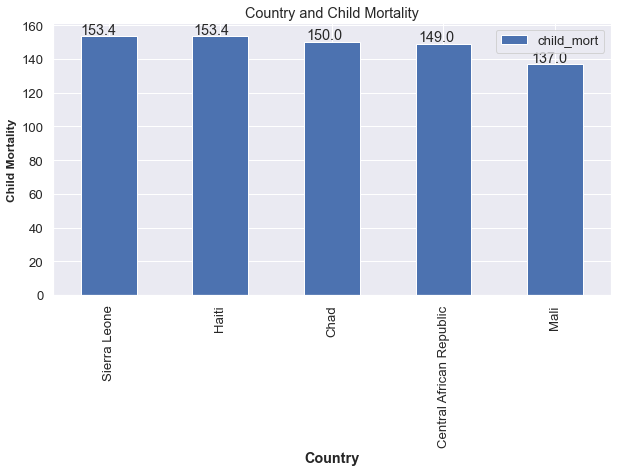

In [50]:
df_list_cm = pd.DataFrame(finalList.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

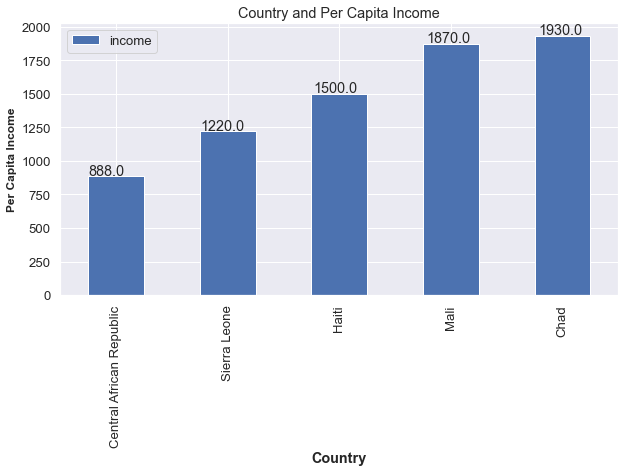

In [52]:
df_list_in = pd.DataFrame(finalList.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

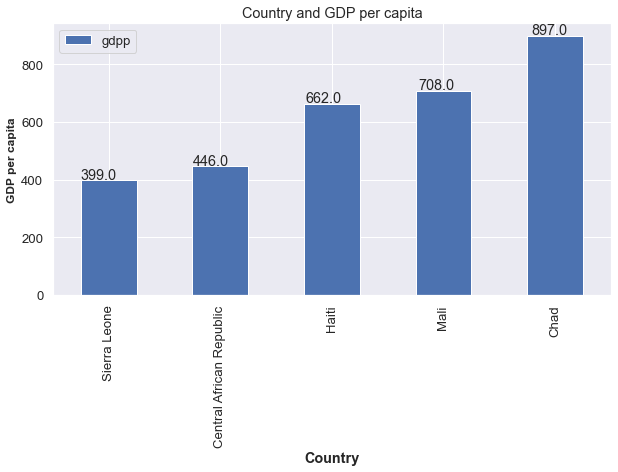

In [53]:
df_list_gdp =pd.DataFrame(finalList.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()